In [68]:
def bezier(X, Y, LGPX, LGPY, RGPX, RGPY):
    data = []
    for i in range(len(LGPX)):
        A = [X[i], 3 * (LGPX[i] - X[i]), \
             3 * (X[i] + RGPX[i] - 2 * LGPX[i]),\
            X[i+1] - X[i] + 3 * LGPX[i] - 3 * RGPX[i]]
        B = [Y[i], 3 * (LGPY[i] - Y[i]), \
             3 * (Y[i] + RGPY[i] - 2 * LGPY[i]),\
            Y[i+1] - Y[i] + 3 * LGPY[i] - 3 * RGPY[i]]
        data.append([A, B])
    return data

In [69]:
X = [1, 6]
Y = [6, 2]
LGPX = [1.5]
LGPY = [1.25]
RGPX = [7]
RGPY = [3]

In [103]:
coefs = bezier(X, Y, LGPX, LGPY, RGPX, RGPY)
coefs

[[[1, 1.5, 15.0, -11.5], [6, -14.25, 19.5, -9.25]]]

In [104]:
coefs = np.array([coefs[0][0], coefs[0][1]])


In [106]:
a2l.to_ltx(np.array(coefs), arraytype='tabular')

\begin{tabular}
  1.00 &  1.50 &  15.00 & -11.50\\
  6.00 & -14.25 &  19.50 & -9.25
\end{tabular}


In [72]:
y, t = sy.symbols('y t')

In [73]:
eqs = []
for i in coefs:
    eq = i[0]
    for power, j in enumerate(i[1:]):
        display(j, (t ** (power + 1)))
        eq += j * (t ** (power + 1))
    eqs.append(eq)

1.5

t

15.0

t**2

-11.5

t**3

-14.25

t

19.5

t**2

-9.25

t**3

In [74]:
import matplotlib.pyplot as plt

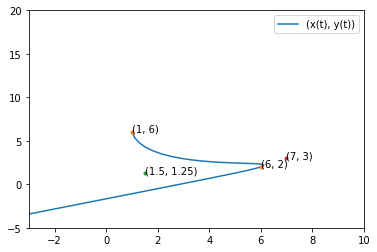

In [98]:
fig = plt.figure()
ax = fig.gca()

# Prepare arrays x, y, z
tval = np.linspace(0, 500, 10000)
xt = [eqs[0].subs(t, i).evalf() for i in tval]
yt = [eqs[1].subs(t, i).evalf() for i in tval]

ax.plot(xt, yt, label='(x(t), y(t))')
ax.plot(X, Y, marker='.', linestyle='None')
for i, k in enumerate(X):
    ax.annotate(f'({k}, {Y[i]})', (k, Y[i]))

ax.plot(LGPX, LGPY, marker ='.', linestyle='None')
for i, k in enumerate(LGPX):
    ax.annotate(f'({k}, {LGPY[i]})', (k, LGPY[i]))
    
ax.plot(RGPX, RGPY, marker ='.', linestyle='None')
for i, k in enumerate(RGPX):
    ax.annotate(f'({k}, {RGPY[i]})', (k, RGPY[i]))

ax.legend()

plt.xlim(-3, 10)
plt.ylim(-5, 20)
plt.show()